In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load the data
cardio_df = pd.read_csv('CardioGoodFitness.csv')
cardio_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#Find the uniqe values in the product column
cardio_df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [5]:
cardio_df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [6]:
# Check for null values and data types
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Convert the object data type to category
cardio_df['Product'] = cardio_df['Product'].astype('category')
cardio_df['Gender'] = cardio_df['Gender'].astype('category')
cardio_df['MaritalStatus'] = cardio_df['MaritalStatus'].astype('category')
cardio_df['Fitness'] = cardio_df['Fitness'].astype('category')
# fix fitness levels
cardio_df['Fitness'] = cardio_df['Fitness'].cat.reorder_categories([1, 2, 3, 4, 5], ordered=True)
cardio_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


Not very important with such a small data set, but the memory usage has dropped by using categorical values and can also be sorted if needed.

c:\Users\magsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


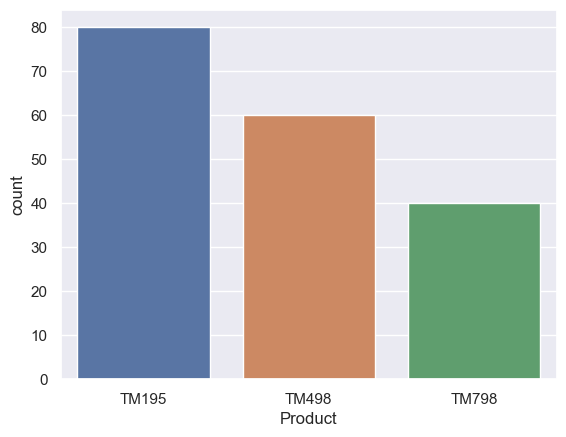

In [8]:
# Now we can do some exploratory data analysis
# First, let's look at the distribution of the target variables (Product_TM195, Product_TM498, Product_TM798)
sns.countplot(cardio_df['Product'], label = "Count")
plt.show()


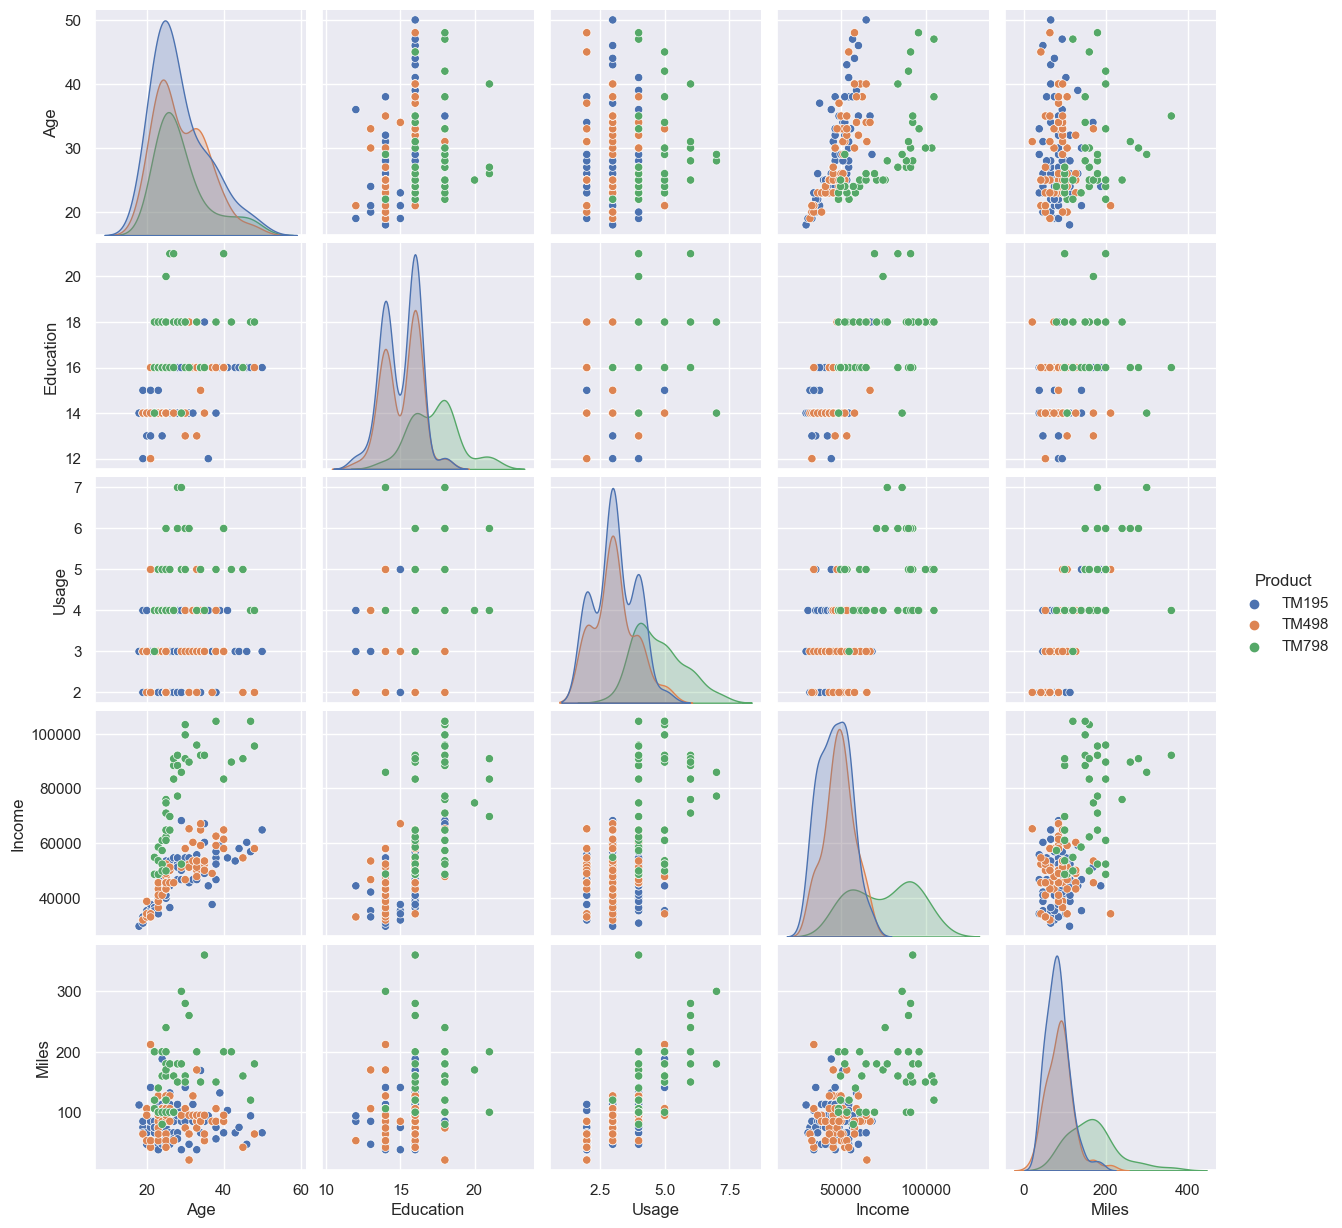

In [9]:
# Now let's look at the relationship between the variables and the target variable
sns.pairplot(cardio_df, hue='Product')
plt.show()


C:\Users\magsa\AppData\Local\Temp\ipykernel_10236\3979171461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cardio_df.corr()


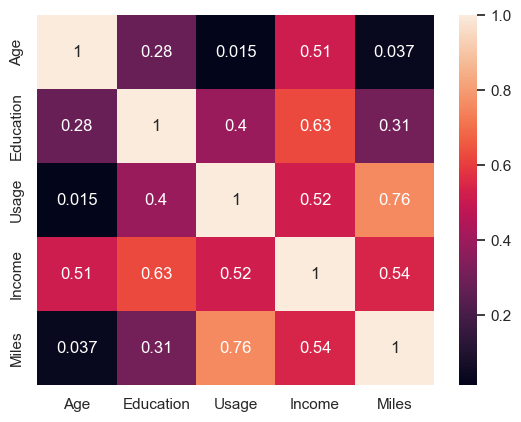

In [10]:
# Now let's look at the correlation between the variables
corr = cardio_df.corr()
sns.heatmap(corr, annot=True)
plt.show()


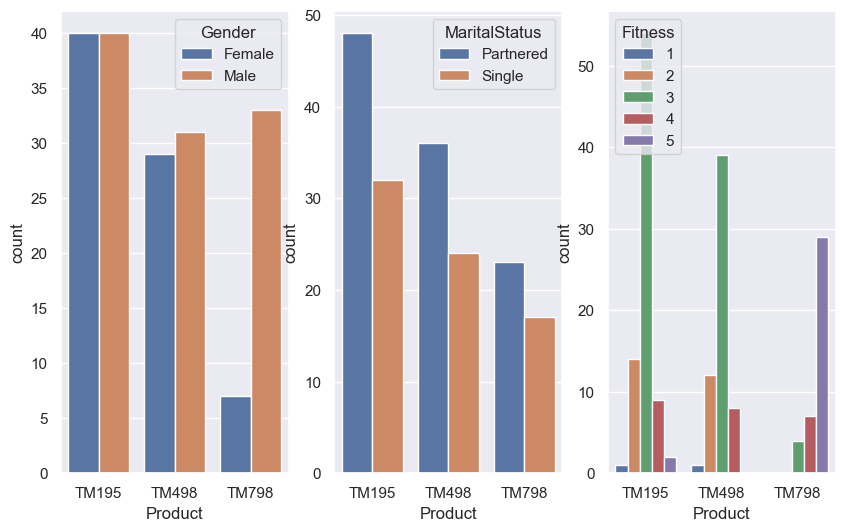

In [11]:
# Now let's look at Gender and MaritalStatus by Product

# Create a matplotlib figure object
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

# Plot the first subplot
sns.countplot(x='Product', hue='Gender', data=cardio_df, ax=axes[0])

# Plot the second subplot
sns.countplot(x='Product', hue='MaritalStatus', data=cardio_df, ax=axes[1])

# Plot the third subplot
sns.countplot(x='Product', hue='Fitness', data=cardio_df, ax=axes[2])

# Show the plot
plt.show()


### Preprocessing

In [12]:
# Merge product TM195 and TM 498 into one category
cardio_df['Product'] = cardio_df['Product'].replace(['TM195', 'TM498'], 'TM195_TM498')
cardio_df['Product'].unique()


['TM195_TM498', 'TM798']
Categories (2, object): ['TM195_TM498', 'TM798']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = cardio_df['Product'] = le.fit_transform(cardio_df['Product'])
target
cardio_df['Gender'] = le.fit_transform(cardio_df['Gender'])
cardio_df['MaritalStatus'] = le.fit_transform(cardio_df['MaritalStatus'])
cardio_df['Fitness'] = le.fit_transform(cardio_df['Fitness'])


In [14]:
cardio_df.drop(['Product'], axis=1, inplace=True)
#Drop categories that are not needed
cardio_df.drop(['Gender', 'MaritalStatus'], axis=1, inplace=True)
cardio_df.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,3,29562,112
1,19,15,2,2,31836,75
2,19,14,4,2,30699,66
3,19,12,3,2,32973,85
4,20,13,4,1,35247,47


In [20]:
#Make a model pipeline with different models and see which one performs the best
#Using the following models:
#1. KNN
#2. Decision Tree
#4. Gradient Boosting
#5. SVM
#6. Logistic Regression

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


#First split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cardio_df, target, test_size=0.3, random_state=42, stratify=target)

#Create a list with all the models
model_pipeline = []
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier(random_state=42))
model_pipeline.append(GradientBoostingClassifier(random_state=42))
model_pipeline.append(SVC(random_state=42))
model_pipeline.append(LogisticRegression(random_state=42))



In [18]:
from sklearn import metrics

#Create the list of models and the accuracy of each model
model_list = ['KNN', 'Decision Tree', 'Gradient Boosting', 'SVM', 'Logistic Regression']
accuracy_list = []
mean_corss_val=[]

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_corss_val.append(scores.mean())

#Let us now compare the performance of the models
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list, 'Cross Validation': mean_corss_val})
result_df



c:\Users\magsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Model,Accuracy,Cross Validation
0,KNN,0.851852,0.904923
1,Decision Tree,0.907407,0.976000
2,Gradient Boosting,0.925926,0.976308
3,SVM,0.851852,0.920615
4,Logistic Regression,0.944444,0.952308


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Create the decision tree classifier model
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=1,
                             max_features=6, min_samples_split=2, splitter='best', random_state= 42)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Print the accuracy score
print('Accuracy: ', dtc.score(X_test, y_test))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
scores = cross_val_score(dtc, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)


Accuracy:  0.9074074074074074
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.82      0.75      0.78        12

    accuracy                           0.91        54
   macro avg       0.87      0.85      0.86        54
weighted avg       0.91      0.91      0.91        54

Mean cross-validation score:  0.976
Standard deviation in cross-validation score:  0.03199999999999999


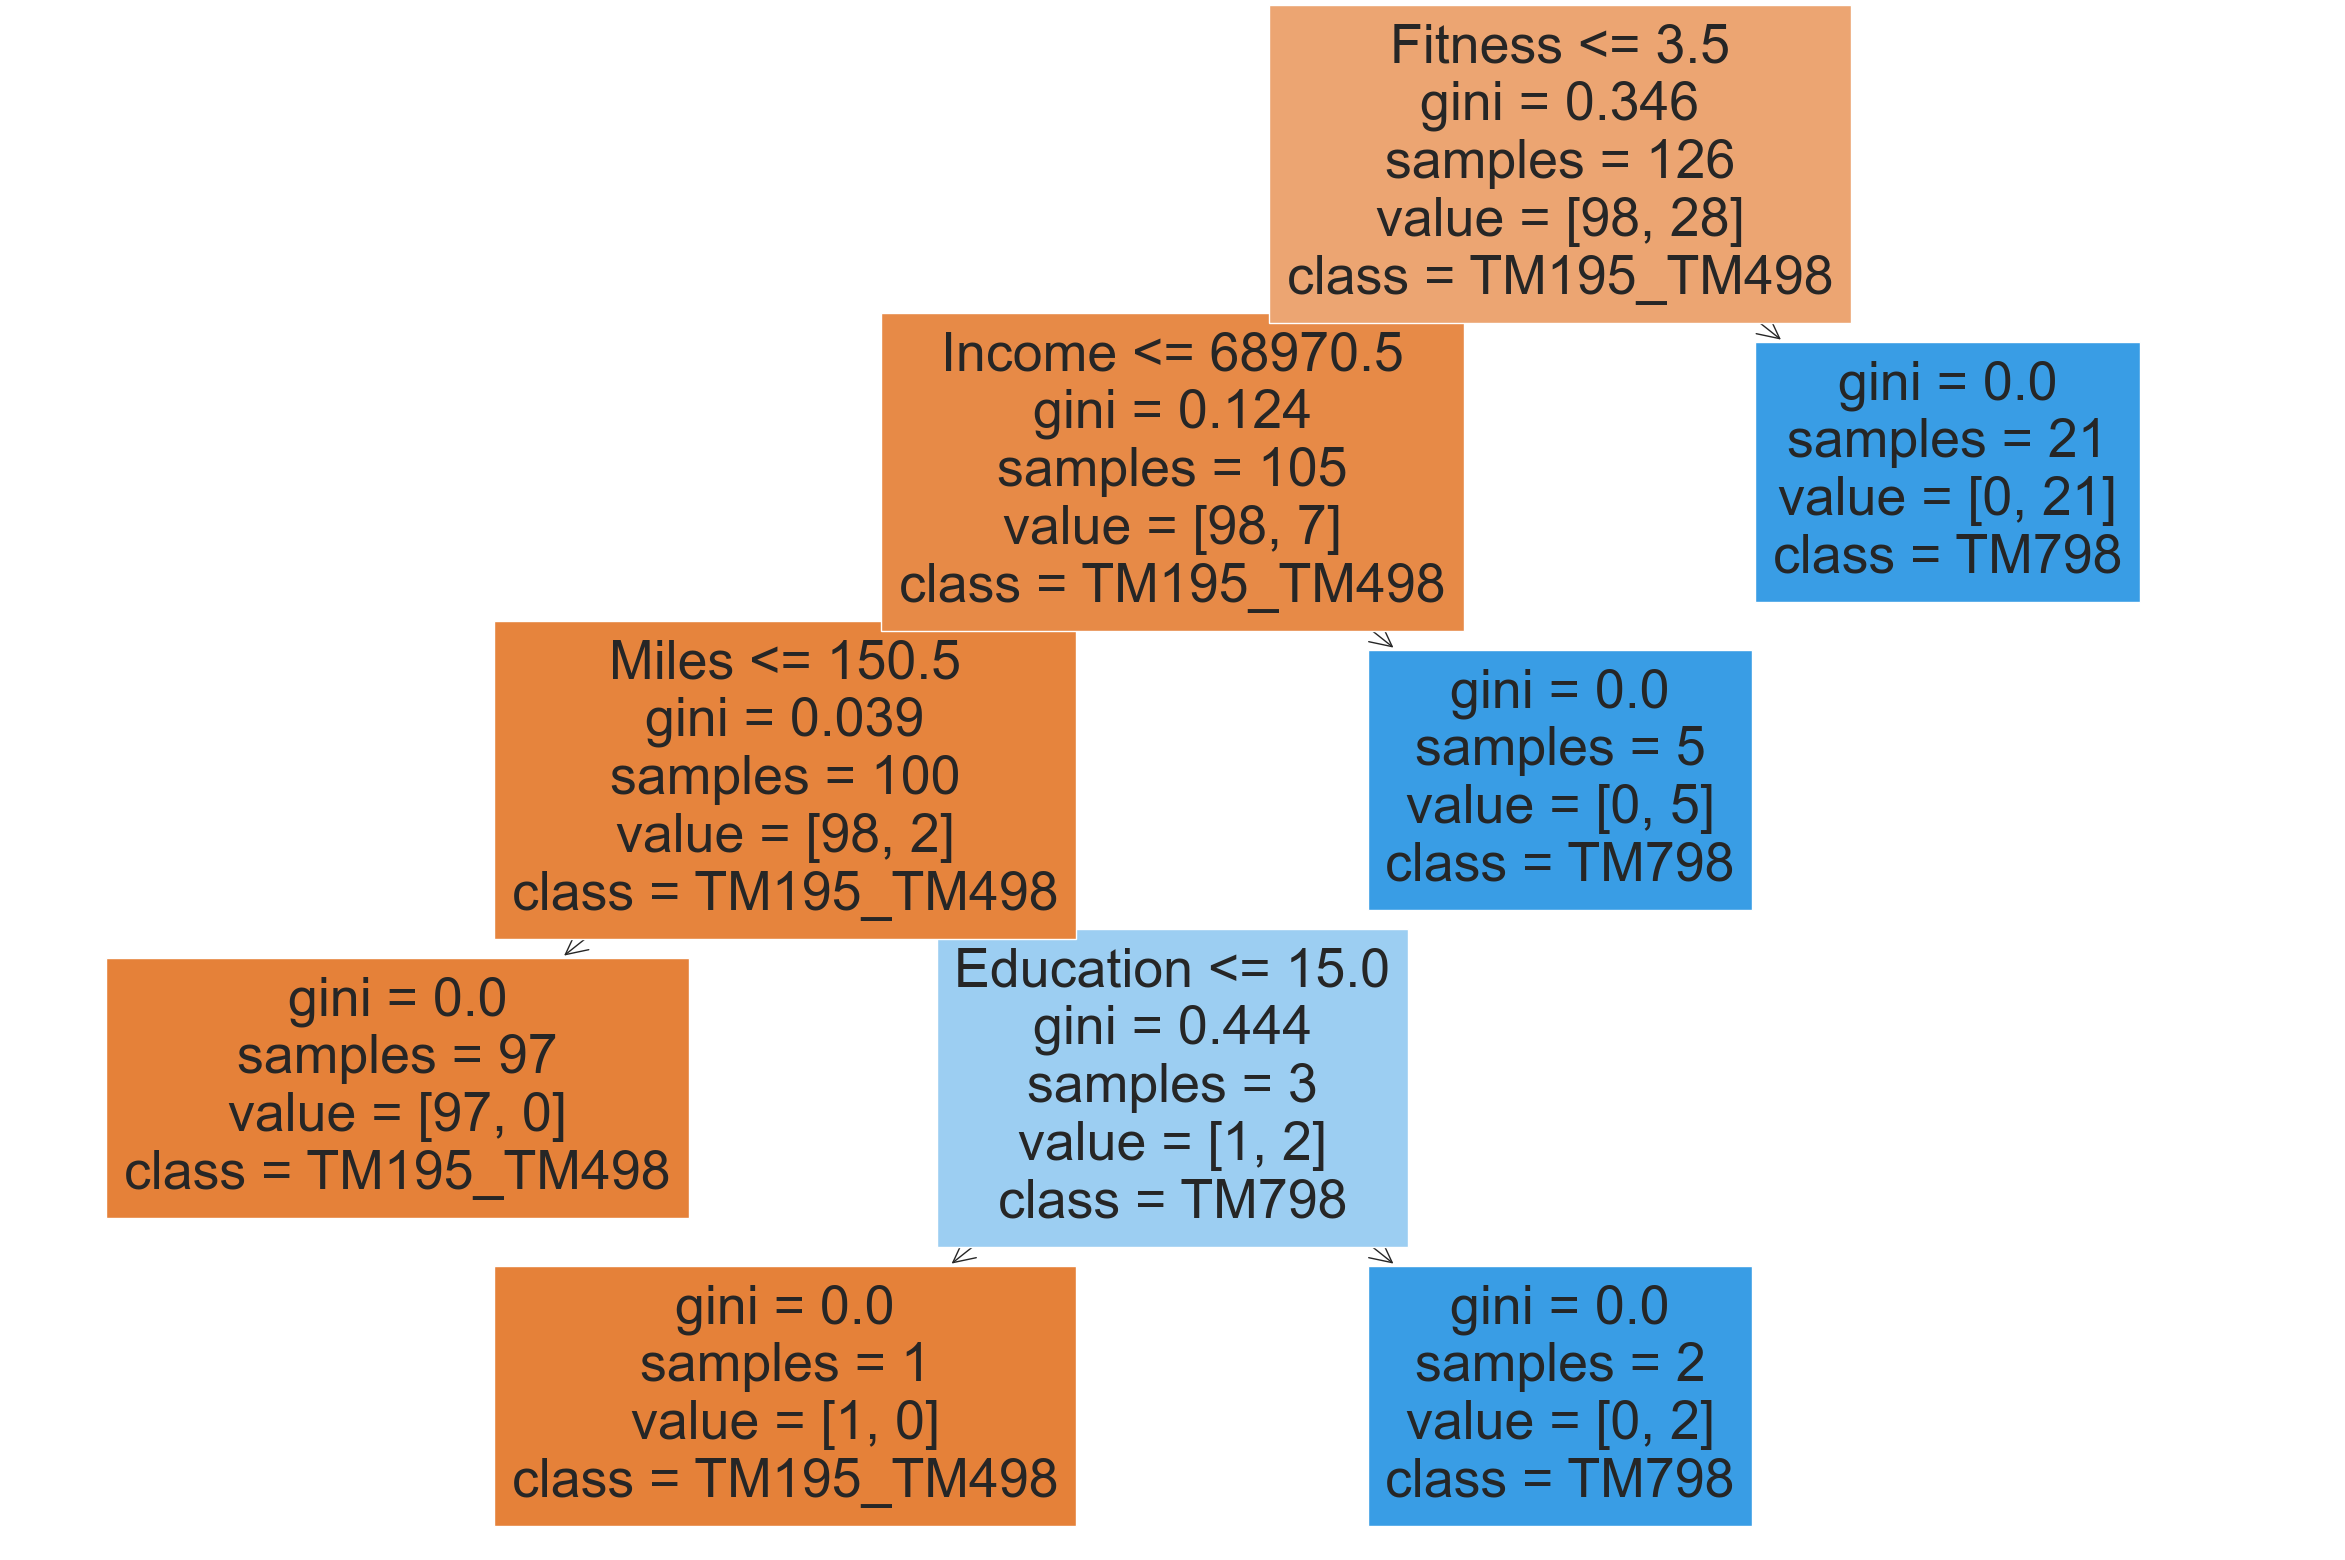

In [22]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dtc, filled=True, feature_names=cardio_df.columns,
          class_names=['TM195_TM498', 'TM798'])
plt.show()


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5, 6, 7],
    'min_samples_split': [1,2,3,4,5,6],
    'min_samples_leaf': [1, 2,],
    'max_features': [ 5, 6],
    'splitter': ['best', 'random'],
    'random_state': [42],
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5,)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Best cross-validation score: 0.992


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

gbc = GradientBoostingClassifier(
    n_estimators=150, learning_rate=0.1, max_depth=6, min_samples_leaf= 2, min_samples_split= 4, random_state=42,)

gbc.fit(X_train, y_train)

accuracy = gbc.score(X_test, y_test)

scores = cross_val_score(gbc, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

print('Accuracy: ', accuracy)
# Print the classification report
print(classification_report(y_test, y_pred))
print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)





Accuracy:  0.9259259259259259
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.91      0.83      0.87        12

    accuracy                           0.94        54
   macro avg       0.93      0.90      0.92        54
weighted avg       0.94      0.94      0.94        54

Mean cross-validation score:  0.9763076923076923
Standard deviation in cross-validation score:  0.0193528433150971


In [40]:
# Create a list of hyperparameters to tune

param_grid = {'n_estimators': [150, 200, 230], 'learning_rate': 
              [0.1, 0.2,0.3], 'max_depth': [6,7,8], 'min_samples_split': [4,5,7], 'min_samples_leaf': [1, 2, 3], 'random_state': [42],}
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

scores = cross_val_score(gbc, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#Print the best hyperparameters
print("Best parameters: ", best_params)
print("Mean cross-validation score:", mean_score)
print("Standard deviation in cross-validation score:", std_score)


Best parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150, 'random_state': 42}
Mean cross-validation score: 0.9683076923076923
Standard deviation in cross-validation score: 0.029857254081743258


In [54]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, solver='liblinear', penalty='l1', random_state=42 )

lr.fit(X_train, y_train)

accuracy = lr.score(X_test, y_test)

scores = cross_val_score(lr, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#print the scores
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))
print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)


Accuracy:  0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.91      0.83      0.87        12

    accuracy                           0.94        54
   macro avg       0.93      0.90      0.92        54
weighted avg       0.94      0.94      0.94        54

Mean cross-validation score:  0.992
Standard deviation in cross-validation score:  0.016000000000000014


In [53]:
#Tune the hyperparameters of the logistic regression model
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000],
    'solver': ['liblinear'],
    'multi_class': ['ovr', 'multinomial'],
    'random_state': [42],
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

scores = cross_val_score(lr, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

#Print the best hyperparameters
print("Best parameters: ", best_params)
print("Mean cross-validation score:", mean_score)
print("Standard deviation in cross-validation score:", std_score)


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\magsa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.f

Best parameters:  {'C': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Mean cross-validation score: 0.9523076923076923
Standard deviation in cross-validation score: 0.05883282905953045


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_